In [21]:
#%pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# Inciso 1

In [22]:
df = pd.read_csv('datasets/healthcare-dataset-stroke-data.csv')

In [23]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [24]:
ds = df[['work_type','smoking_status','avg_glucose_level']]

In [25]:
ds

,work_type,smoking_status,avg_glucose_level
0,Private,formerly smoked,228.69
1,Self-employed,never smoked,202.21
2,Private,never smoked,105.92
3,Private,smokes,171.23
4,Self-employed,never smoked,174.12
...,...,...,...
5105,Private,never smoked,83.75
5106,Self-employed,never smoked,125.20
5107,Self-employed,never smoked,82.99
5108,Private,formerly smoked,166.29


In [26]:
gres = ds.groupby(['work_type','smoking_status'])['avg_glucose_level'].mean().reset_index()

In [27]:
gres

,work_type,smoking_status,avg_glucose_level
0,Govt_job,Unknown,101.098770
1,Govt_job,formerly smoked,115.827820
2,Govt_job,never smoked,109.301773
3,Govt_job,smokes,102.075500
4,Never_worked,Unknown,92.842500
5,Never_worked,never smoked,97.871429
6,Private,Unknown,104.321688
7,Private,formerly smoked,111.202957
8,Private,never smoked,106.164327
9,Private,smokes,106.816059


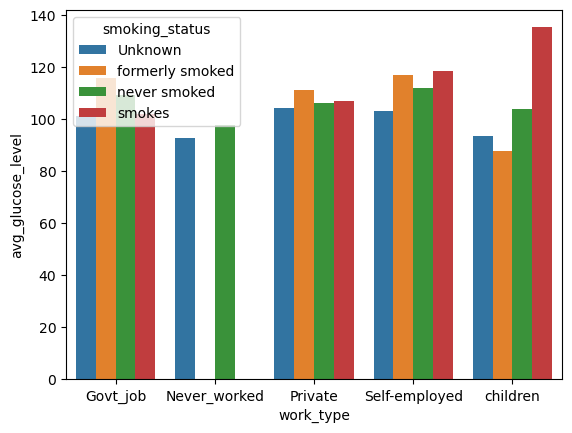

In [28]:
sns.barplot(data=gres,x='work_type',y='avg_glucose_level',hue='smoking_status')
plt.show()

In [29]:
x_combination = []
y_height = []

for index, row in gres.iterrows():
    x_combination.append(row['work_type']+' - '+row['smoking_status'])
    y_height.append(row['avg_glucose_level'])

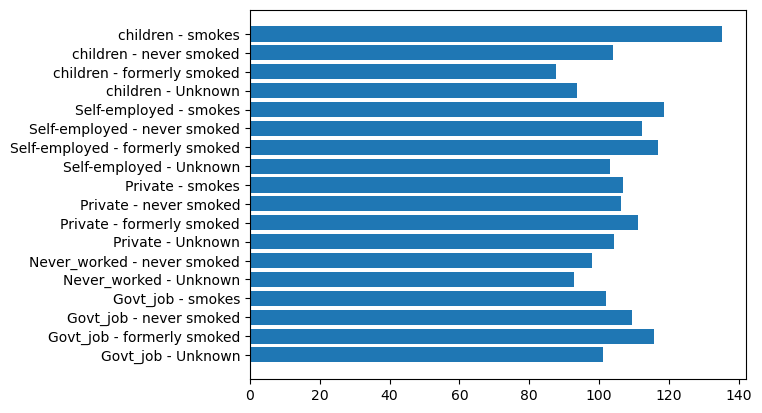

In [30]:
plt.barh(y=x_combination,width=y_height)
plt.show()

In [31]:
matrix = gres.pivot(index='work_type',columns='smoking_status',values='avg_glucose_level')

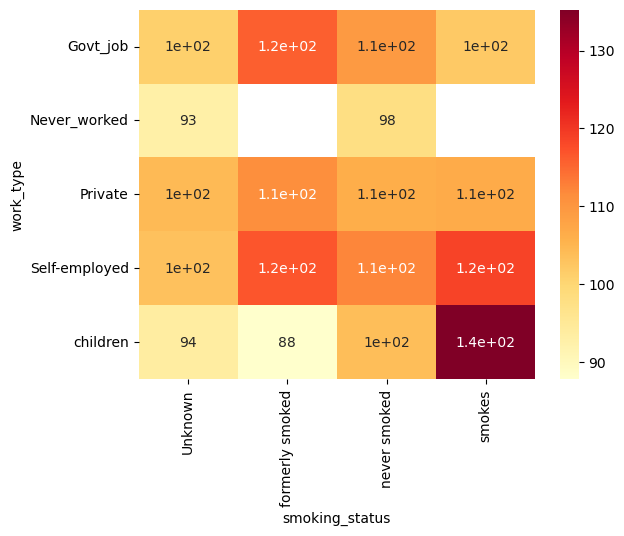

In [32]:
sns.heatmap(matrix,annot=True,cmap="YlOrRd") #el color map es ese porque así entre más claro más bajo y se evitan confusiones con los nulos
plt.show()

# Inciso 2

In [33]:
df2 = pd.read_csv('datasets/online_shoppers_intention.csv')

In [34]:
df2

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [35]:
ds2 = df2[['ProductRelated_Duration','Revenue']]

In [36]:
ds2

,ProductRelated_Duration,Revenue
0,0.000000,False
1,64.000000,False
2,0.000000,False
3,2.666667,False
4,627.500000,False
...,...,...
12325,1783.791667,False
12326,465.750000,False
12327,184.250000,False
12328,346.000000,False


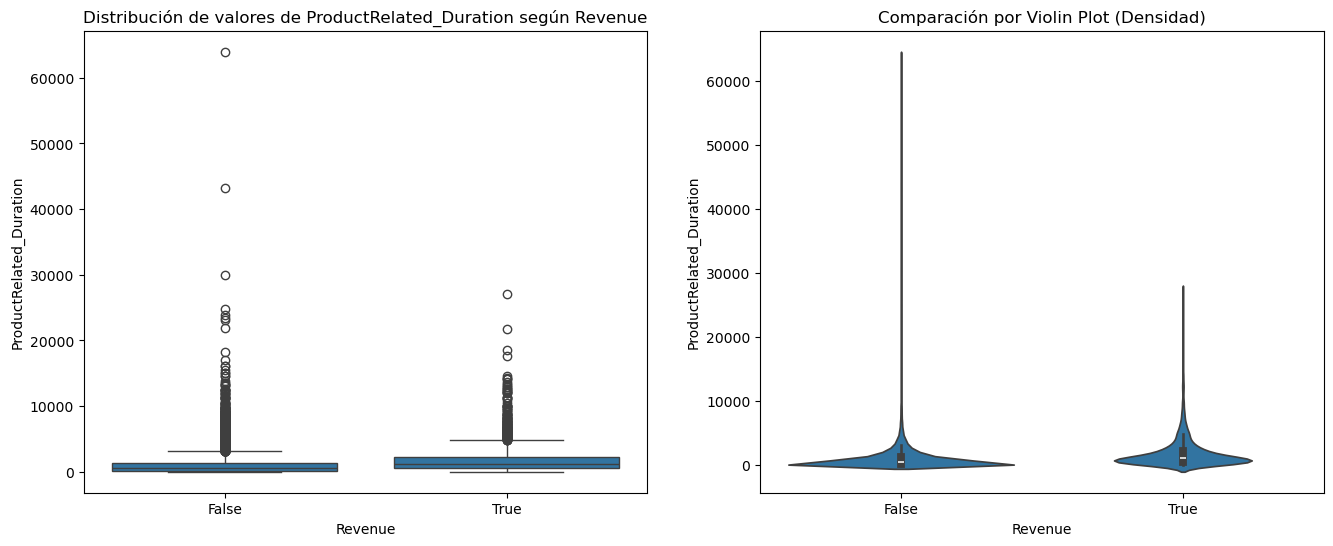

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Visualización boxplot
sns.boxplot(x='Revenue', y='ProductRelated_Duration', data=ds2, ax=axes[0])
axes[0].set_title("Distribución de valores de ProductRelated_Duration según Revenue")

# Visualización violin plot
sns.violinplot(x='Revenue', y='ProductRelated_Duration', data=ds2, ax=axes[1])
axes[1].set_title('Comparación por Violin Plot (Densidad)')

plt.show()

# Inciso 3

In [39]:
df3 = pd.read_csv('datasets/WHR_2023.csv')

In [40]:
df3

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027


In [41]:
ds3 = df3[['happiness_score','gdp_per_capita','healthy_life_expectancy']]

In [42]:
ds3

,happiness_score,gdp_per_capita,healthy_life_expectancy
0,7.804,1.888,0.535
1,7.586,1.949,0.537
2,7.530,1.926,0.559
3,7.473,1.833,0.577
4,7.403,1.942,0.545
...,...,...,...
132,3.207,0.531,0.105
133,3.204,0.758,0.069
134,3.138,0.670,0.092
135,2.392,1.417,0.398


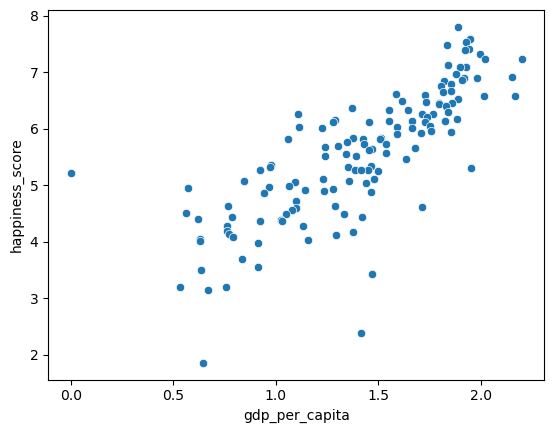

In [43]:
sns.scatterplot(df3,x=df3.gdp_per_capita,y=df3.happiness_score)
plt.show()

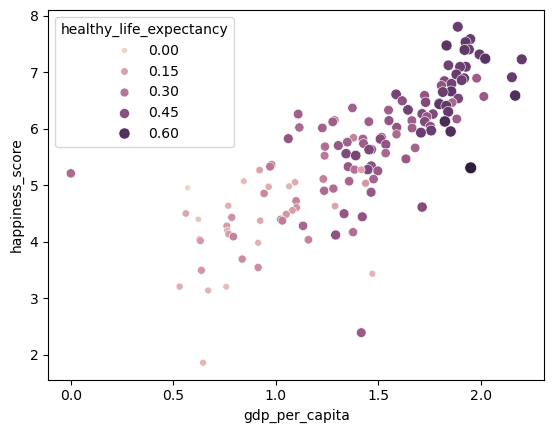

In [44]:
sns.scatterplot(df3,x=df3.gdp_per_capita,y=df3.happiness_score,size=df3.healthy_life_expectancy,hue=df3.healthy_life_expectancy)
plt.show()

# Inciso 4

In [46]:
df4 = pd.read_csv('datasets/WineQT.csv')

In [47]:
df4

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [48]:
ds4 = df4[['pH','alcohol','fixed acidity','volatile acidity','residual sugar','residual sugar']]

In [49]:
ds4

,pH,alcohol,fixed acidity,volatile acidity,residual sugar,residual sugar
0,3.51,9.4,7.4,0.700,1.9,1.9
1,3.20,9.8,7.8,0.880,2.6,2.6
2,3.26,9.8,7.8,0.760,2.3,2.3
3,3.16,9.8,11.2,0.280,1.9,1.9
4,3.51,9.4,7.4,0.700,1.9,1.9
...,...,...,...,...,...,...
1138,3.42,11.0,6.3,0.510,2.3,2.3
1139,3.42,9.5,6.8,0.620,1.9,1.9
1140,3.45,10.5,6.2,0.600,2.0,2.0
1141,3.52,11.2,5.9,0.550,2.2,2.2


In [50]:
ds4.corr()

,pH,alcohol,fixed acidity,volatile acidity,residual sugar,residual sugar
pH,1.000000,0.225322,-0.685163,0.221492,-0.116959,-0.116959
alcohol,0.225322,1.000000,-0.075055,-0.203909,0.058421,0.058421
fixed acidity,-0.685163,-0.075055,1.000000,-0.250728,0.171831,0.171831
volatile acidity,0.221492,-0.203909,-0.250728,1.000000,-0.005751,-0.005751
residual sugar,-0.116959,0.058421,0.171831,-0.005751,1.000000,1.000000
residual sugar,-0.116959,0.058421,0.171831,-0.005751,1.000000,1.000000


<Axes: >

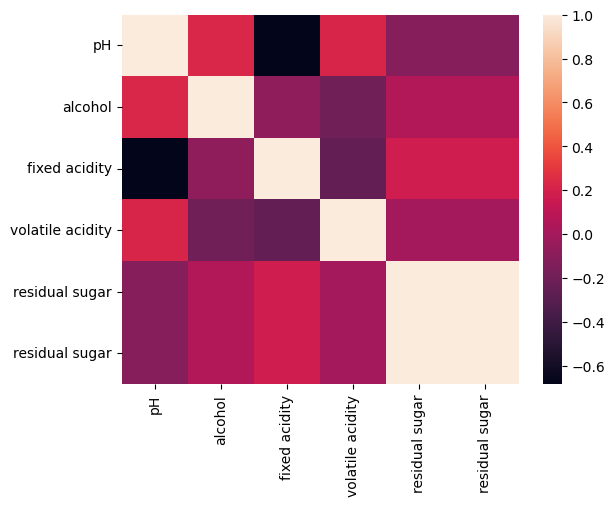

In [51]:
matriz = ds4.corr()
sns.heatmap(matriz)

# Inciso 5

In [52]:
df5 = pd.read_csv('datasets/meteorite-landings.csv')

In [53]:
df5

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


In [54]:
df5 = df5.dropna(subset=['year','reclat','reclong','mass'])
ds5 = df5[['year','reclat','reclong','mass']]

In [55]:
ds5

,year,reclat,reclong,mass
0,1880.0,50.77500,6.08333,21.0
1,1951.0,56.18333,10.23333,720.0
2,1952.0,54.21667,-113.00000,107000.0
3,1976.0,16.88333,-99.90000,1914.0
4,1902.0,-33.16667,-64.95000,780.0
...,...,...,...,...
45711,1990.0,29.03700,17.01850,172.0
45712,1999.0,13.78333,8.96667,46.0
45713,1939.0,49.25000,17.66667,3.3
45714,2003.0,49.78917,41.50460,2167.0


In [56]:
ds5['year'] = ds5['year'].astype(int)

C:\Users\m_com\AppData\Local\Temp\ipykernel_12108\2670658577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds5['year'] = ds5['year'].astype(int)


In [57]:
ds5_mayor = ds5[(ds5['year'] >= 2000) & (ds5['year'] <= 2016)]

In [58]:
ds5_mayor

,year,reclat,reclong,mass
18,2001,13.66033,28.96000,700.0
22,2002,45.82133,6.01533,252.0
30,2008,20.74575,32.41275,3950.0
49,2009,31.80500,-97.01000,9500.0
82,2006,15.78333,-5.90000,29560.0
...,...,...,...,...
45687,2011,34.81970,-114.27610,3.0
45688,2011,34.82658,-114.27763,25.9
45689,2011,34.81923,-114.27735,200.0
45702,2002,32.15833,4.63333,1058.0


In [59]:
gdf = gpd.GeoDataFrame(ds5_mayor,geometry=gpd.points_from_xy(ds5_mayor.reclong, ds5_mayor.reclat))

<function matplotlib.pyplot.show(close=None, block=None)>

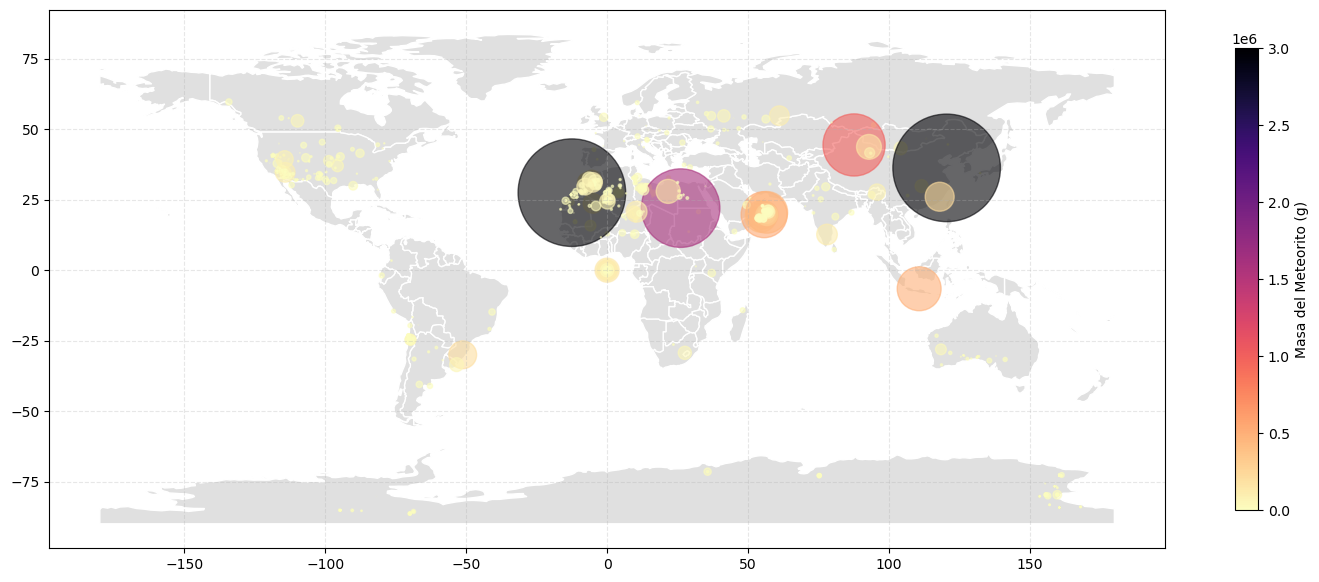

In [60]:
fig, ax = plt.subplots(figsize=(18, 12))
url_mapa = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url_mapa)
world.plot(ax=ax, color='#e0e0e0', edgecolor='white')
gdf.plot(ax=ax,markersize=ds5_mayor['mass'] / 500,column='mass',cmap='magma_r',alpha=0.6,legend=True,
         legend_kwds={'label': "Masa del Meteorito (g)", 'shrink': 0.5})
plt.grid(True, linestyle='--', alpha=0.3)
plt.show